In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-data/Cancer_Data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Loading Data**

In [3]:
df = pd.read_csv("/kaggle/input/cancer-data/Cancer_Data.csv")
df_backup = df.copy()
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
#df = df_backup

# **Data Preprocessing**

In [5]:
df = df.drop(["Unnamed: 32"], axis = 1)
df = df.drop(["id"], axis = 1)
df["diagnosis"] = df["diagnosis"].replace(["M", "B"], [1, 0])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Since there are variants of features, we calculate mean of all the variants and compare the correlation**

In [7]:
to_analyzed_col = ["radius", "texture", "perimeter", "area", 
                   "smoothness", "compactness", "concavity", 
                   "concave points", "symmetry", "fractal_dimension"]

In [8]:
def general_heatmap(col):
    # Create a mean column for features
    df[col+"_summary"] = df[[col+'_mean', col+'_se', col+'_worst']].mean(axis=1)
    
    # Correlation Matrix
    corr_matrix = df[[col+'_mean', col+'_se', col+'_worst', col+"_summary", "diagnosis"]].corr()
    
    # Plot heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'HeatMap for {col} Features')
    plt.show()

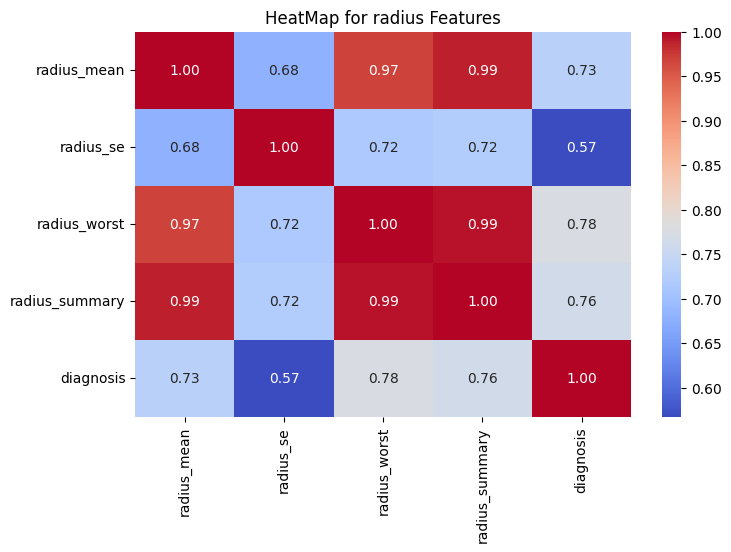

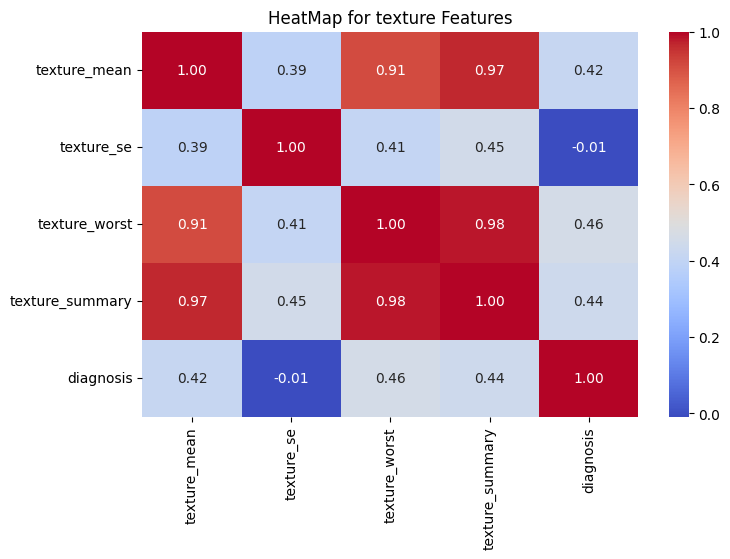

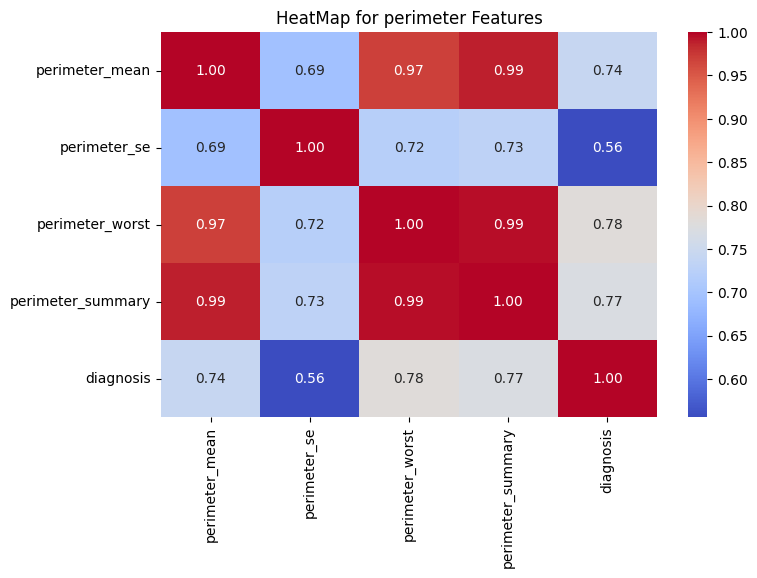

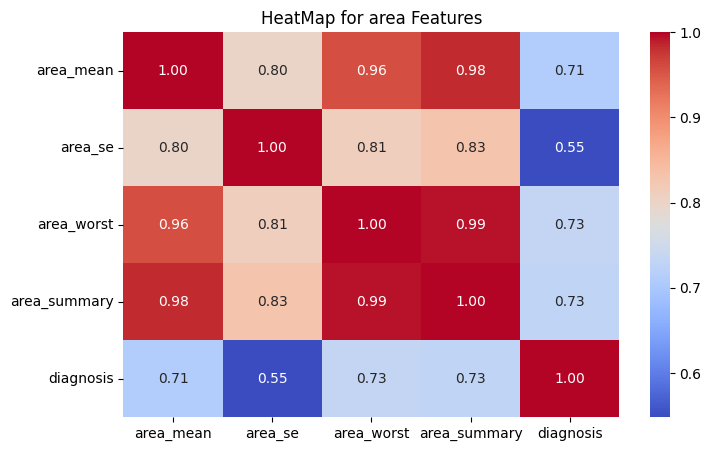

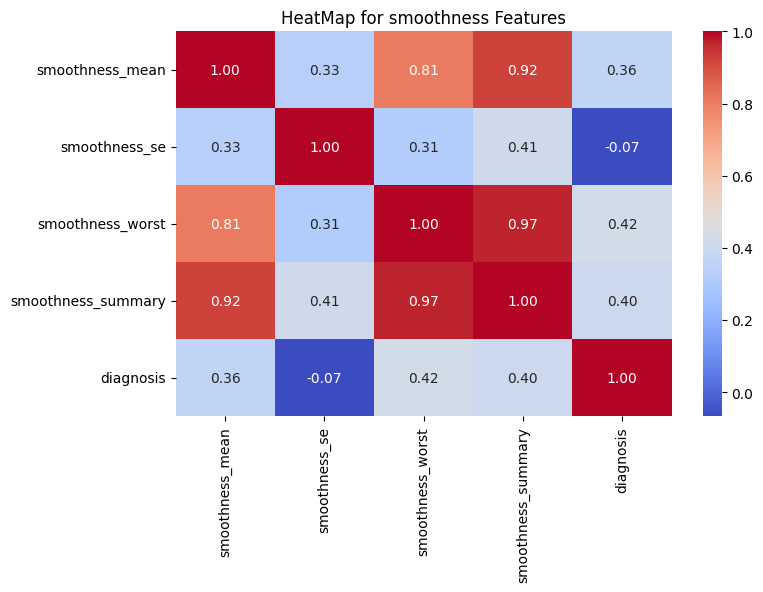

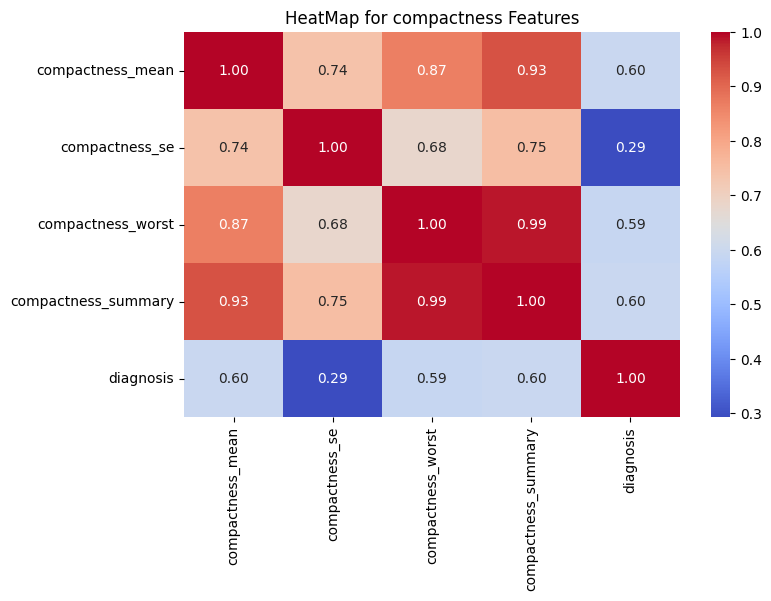

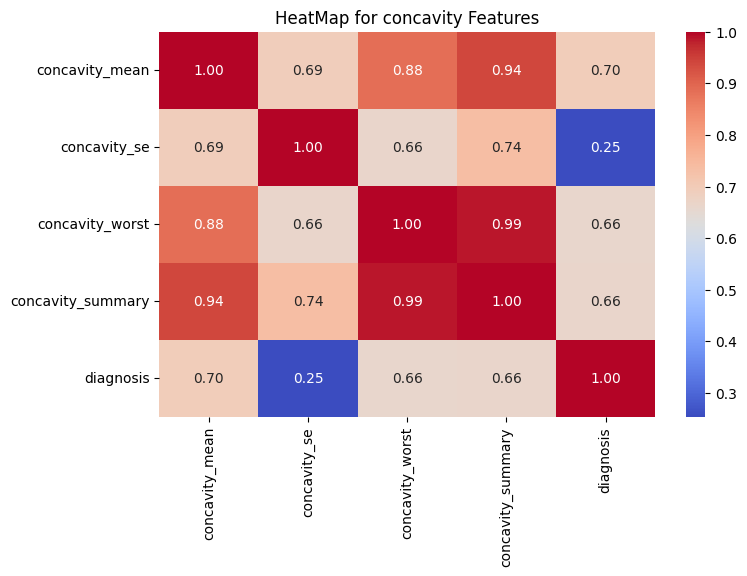

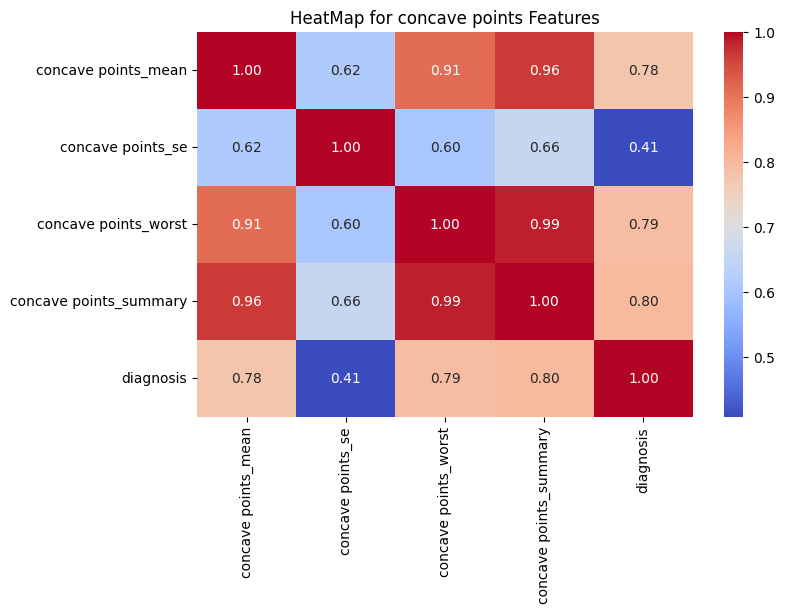

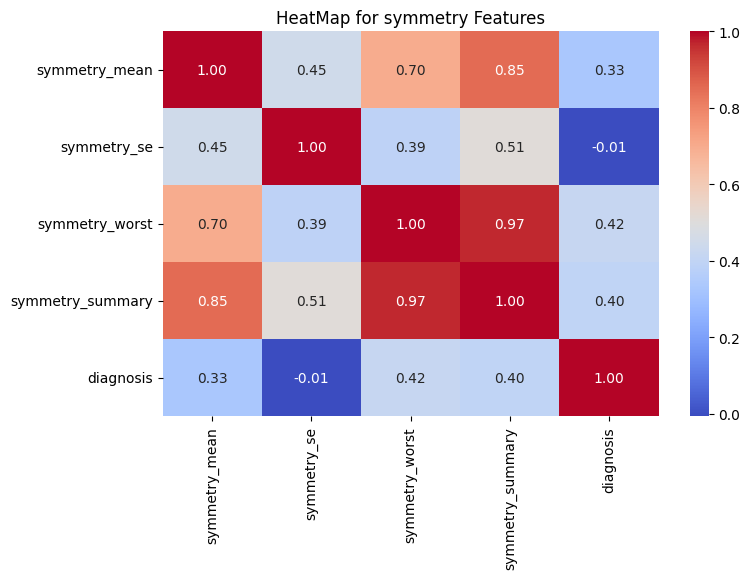

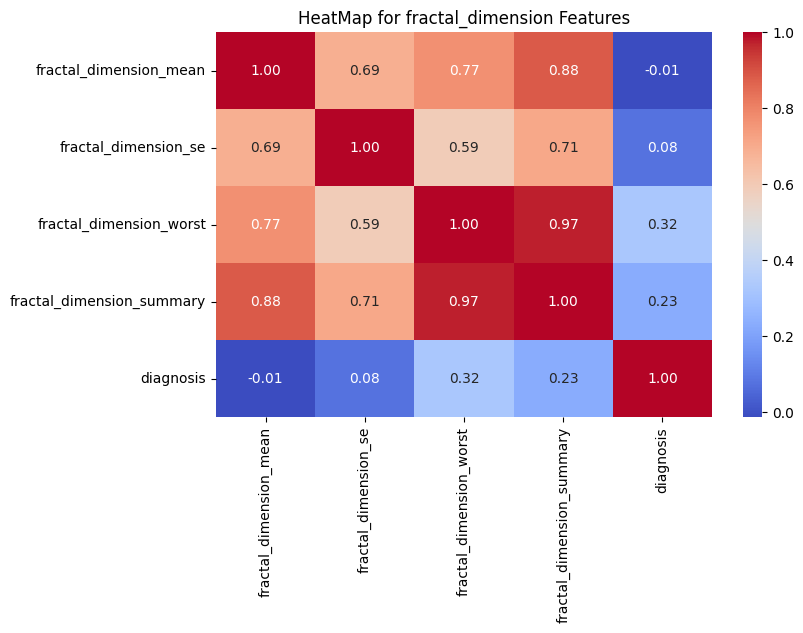

In [9]:
for col in to_analyzed_col:
    general_heatmap(col)

**According to the heatmap, we find that these feature correlate most to "diagnosis"**

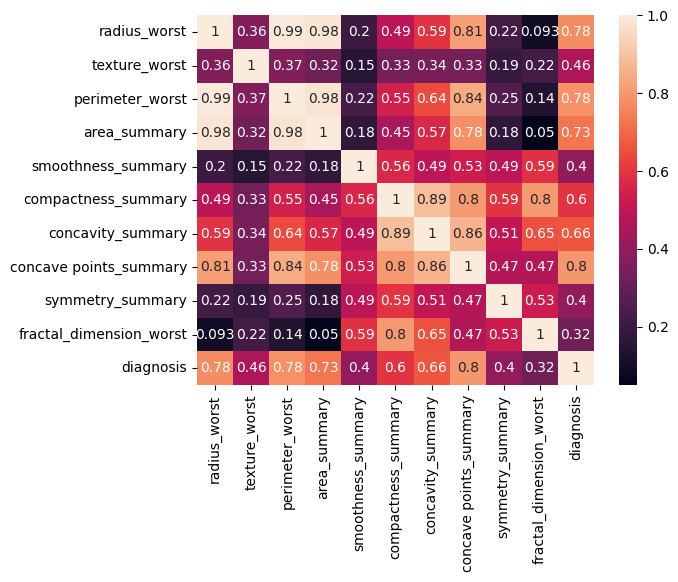

<Figure size 2000x1500 with 0 Axes>

In [10]:
analyzed_col = ["radius_worst", "texture_worst", "perimeter_worst", "area_summary", "smoothness_summary", "compactness_summary", "concavity_summary", "concave points_summary", "symmetry_summary", "fractal_dimension_worst", "diagnosis"]
df_analyzed = df[analyzed_col]
df.drop_duplicates()
sns.heatmap(data = df_analyzed.corr(), annot = True)
plt.figure(figsize=(20,15))
plt.show()

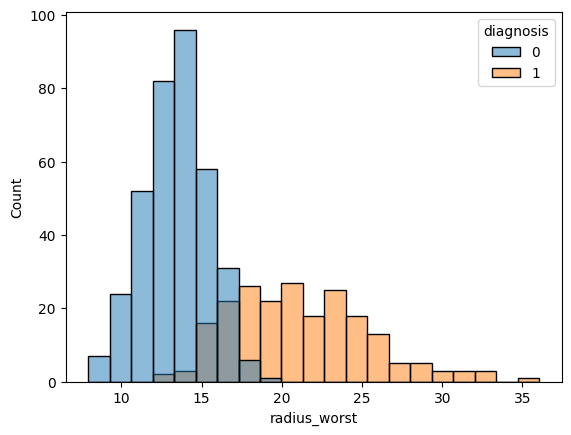

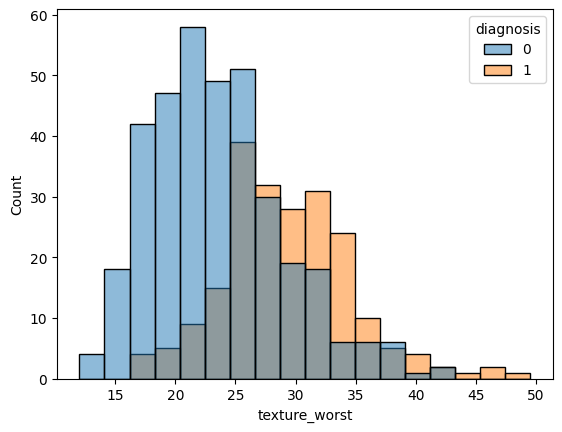

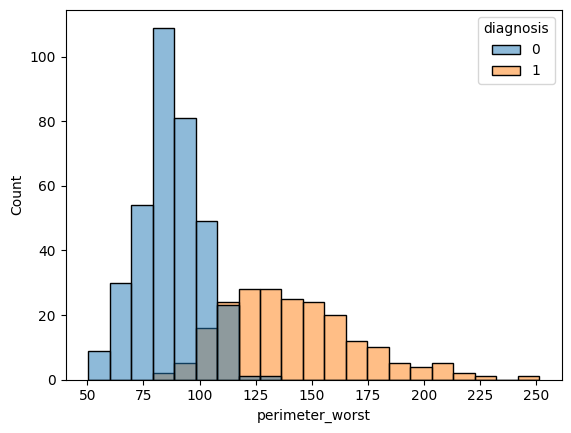

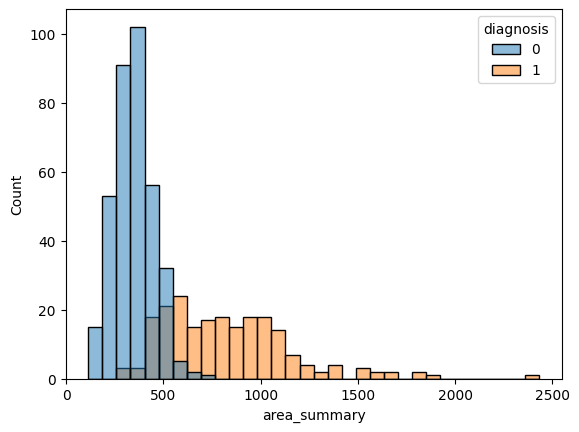

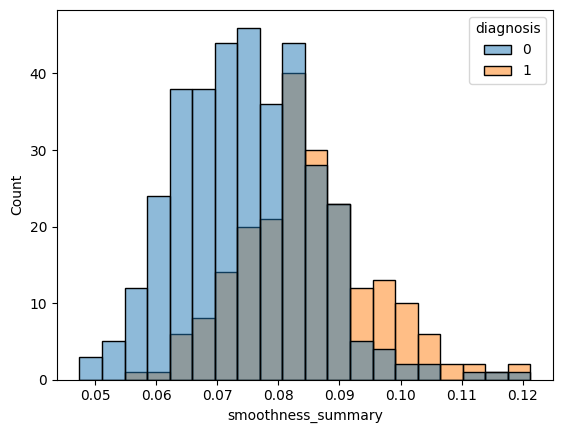

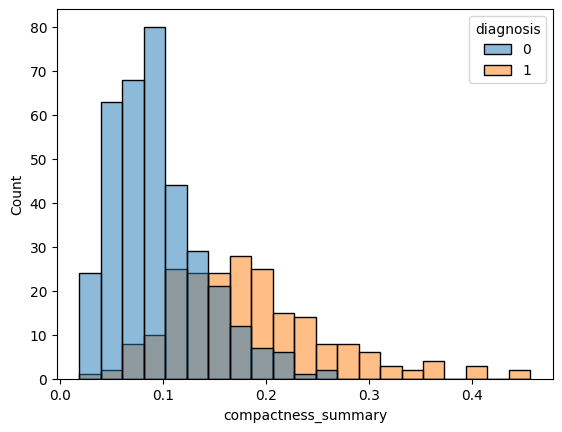

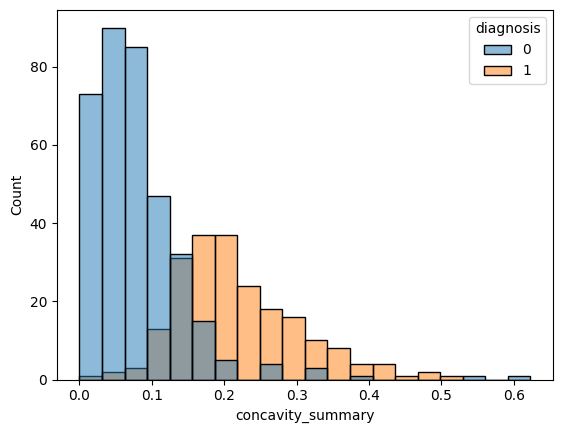

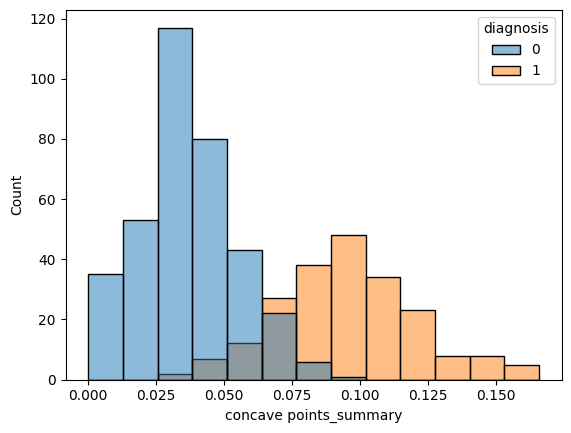

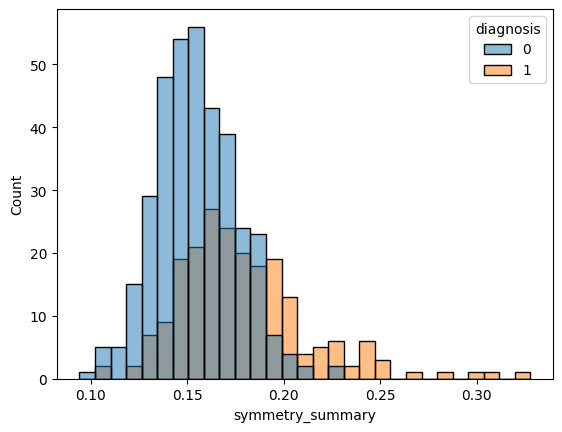

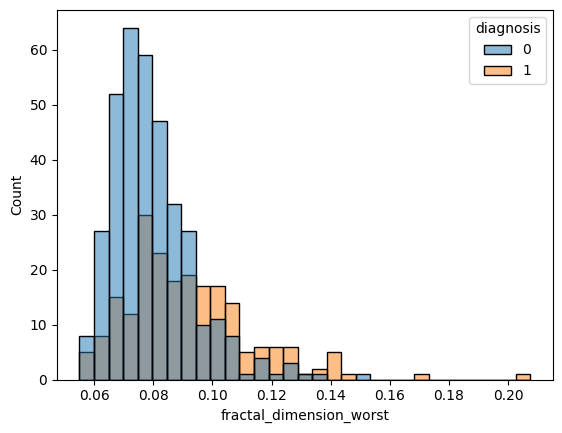

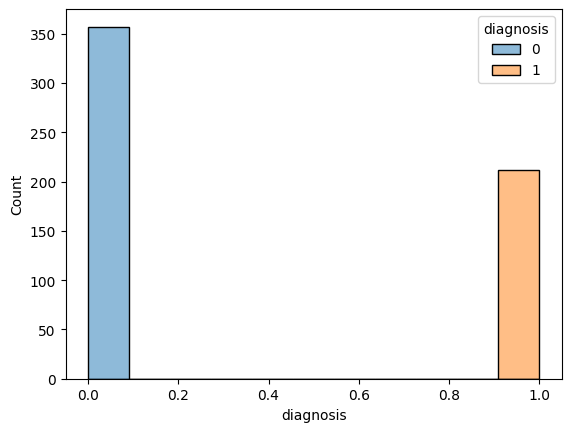

In [11]:
for col in df_analyzed:
    sns.histplot(data = df_analyzed, x = col, hue = "diagnosis")
    plt.show()

**The dataset might have outliners, but most of the outliners are label "1" so we might consider remove them**

In [12]:
from sklearn.model_selection import train_test_split
X = df_analyzed.drop(columns=['diagnosis'])
y = df_analyzed.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


print("Train size:", X_train.shape)
print("Label size:", y_train.shape)

Train size: (426, 10)
Label size: (426,)


# Training Process
We try out many models and filter the best model base on F1 score

In [13]:
models_dict = {
    "CalibratedClassifierCV": None,
    "LabelSpreading": None,
    "LabelPropagation": None,
    "LogisticRegression": None,
    "LinearSVC": None,
    "KNeighborsClassifier": None,
    "RidgeClassifier": None,
    "LinearDiscriminantAnalysis": None,
    "RidgeClassifierCV": None,
    "PassiveAggressiveClassifier": None,
    "SVC": None,
    "SGDClassifier": None,
    "ExtraTreesClassifier": None,
    "BernoulliNB": None,
    "XGBClassifier": None,
    "RandomForestClassifier": None,
    "QuadraticDiscriminantAnalysis": None,
    "LGBMClassifier": None,
    "GaussianNB": None,
    "AdaBoostClassifier": None,
    "ExtraTreeClassifier": None,
    "NuSVC": None,
    "NearestCentroid": None,
    "BaggingClassifier": None,
    "DecisionTreeClassifier": None,
    "Perceptron": None
}

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.pipeline import make_pipeline

def evaluate_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    for model_name in models_dict.keys():
        try:
            # Create a pipeline with corresponding model
            if model_name == "CalibratedClassifierCV":
                from sklearn.calibration import CalibratedClassifierCV
                model = CalibratedClassifierCV()
            elif model_name == "LabelSpreading":
                from sklearn.semi_supervised import LabelSpreading
                model = LabelSpreading()
            elif model_name == "LabelPropagation":
                from sklearn.semi_supervised import LabelPropagation
                model = LabelPropagation()
            elif model_name == "LogisticRegression":
                from sklearn.linear_model import LogisticRegression
                model = LogisticRegression()
            elif model_name == "LinearSVC":
                from sklearn.svm import LinearSVC
                model = LinearSVC()
            elif model_name == "KNeighborsClassifier":
                from sklearn.neighbors import KNeighborsClassifier
                model = KNeighborsClassifier()
            elif model_name == "RidgeClassifier":
                from sklearn.linear_model import RidgeClassifier
                model = RidgeClassifier()
            elif model_name == "LinearDiscriminantAnalysis":
                from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
                model = LinearDiscriminantAnalysis()
            elif model_name == "RidgeClassifierCV":
                from sklearn.linear_model import RidgeClassifierCV
                model = RidgeClassifierCV()
            elif model_name == "PassiveAggressiveClassifier":
                from sklearn.linear_model import PassiveAggressiveClassifier
                model = PassiveAggressiveClassifier()
            elif model_name == "SVC":
                from sklearn.svm import SVC
                model = SVC()
            elif model_name == "SGDClassifier":
                from sklearn.linear_model import SGDClassifier
                model = SGDClassifier()
            elif model_name == "ExtraTreesClassifier":
                from sklearn.ensemble import ExtraTreesClassifier
                model = ExtraTreesClassifier()
            elif model_name == "BernoulliNB":
                from sklearn.naive_bayes import BernoulliNB
                model = BernoulliNB()
            elif model_name == "XGBClassifier":
                from xgboost import XGBClassifier
                model = XGBClassifier()
            elif model_name == "RandomForestClassifier":
                from sklearn.ensemble import RandomForestClassifier
                model = RandomForestClassifier()
            elif model_name == "QuadraticDiscriminantAnalysis":
                from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
                model = QuadraticDiscriminantAnalysis()
            elif model_name == "GaussianNB":
                from sklearn.naive_bayes import GaussianNB
                model = GaussianNB()
            elif model_name == "AdaBoostClassifier":
                from sklearn.ensemble import AdaBoostClassifier
                model = AdaBoostClassifier()
            elif model_name == "ExtraTreeClassifier":
                from sklearn.tree import ExtraTreeClassifier
                model = ExtraTreeClassifier()
            elif model_name == "NuSVC":
                from sklearn.svm import NuSVC
                model = NuSVC()
            elif model_name == "NearestCentroid":
                from sklearn.neighbors import NearestCentroid
                model = NearestCentroid()
            elif model_name == "BaggingClassifier":
                from sklearn.ensemble import BaggingClassifier
                model = BaggingClassifier()
            elif model_name == "DecisionTreeClassifier":
                from sklearn.tree import DecisionTreeClassifier
                model = DecisionTreeClassifier()
            elif model_name == "Perceptron":
                from sklearn.linear_model import Perceptron
                model = Perceptron()

            # Training
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Classification Reports
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            if (accuracy > 0.97 and f1 > 0.96): #Filtering best models
                print(f'Model: {model_name}')
                print(f'Accuracy: {accuracy:.4f}')
                print(report)

        except Exception as e:
            print(f'Error with model {model_name}: {e}')

In [15]:
evaluate_models(X, y)

Model: LinearDiscriminantAnalysis
Accuracy: 0.9720
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Model: ExtraTreesClassifier
Accuracy: 0.9790
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Model: XGBClassifier
Accuracy: 0.9720
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97     

ExtraTreesClassifier is shown to be the best model within these models.

# **Checking overfitting with K-Folds CrossValidation**

In [16]:
#Using K-Folds CrossValidation to check overfitting
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=7, shuffle=True, random_state=42)

etc = ExtraTreesClassifier()

cv_scores = cross_val_score(etc, X, y, cv=kf, scoring='f1')

print("ExtraTreesClassifier:")
print("F1 Score of each folds:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

ExtraTreesClassifier:
F1 Score of each folds: [0.94545455 1.         0.96       0.90909091 1.         0.95774648
 0.94915254]
Mean F1 Score: 0.9602063536845108
Standard Deviation: 0.029582218130547566


**The mean F1 score and F1 score of each folds is acceptable, no sign of overfitting**